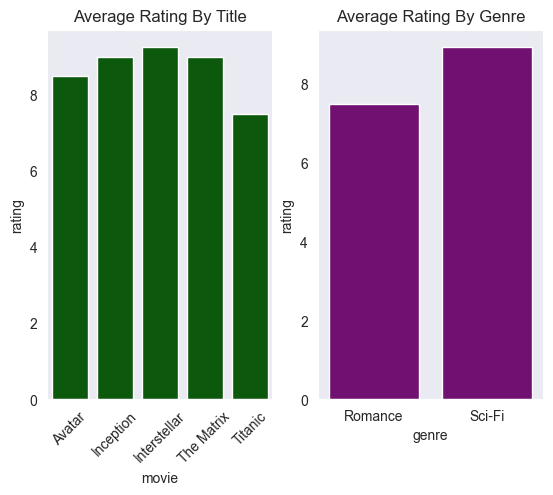

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import altair as alt

data = {
    'movie': [
        'Inception',
        'Inception',
        'Inception',
        'Inception',
        'Titanic',
        'Titanic',
        'Titanic',
        'Titanic',
        'Avatar',
        'Avatar',
        'Avatar',
        'Avatar',
        'The Matrix',
        'The Matrix',
        'The Matrix',
        'The Matrix',
        'Interstellar',
        'Interstellar',
        'Interstellar',
        'Interstellar',
    ],
    'user': [
        'A',
        'B',
        'C',
        'D',
        'A',
        'B',
        'C',
        'D',
        'A',
        'B',
        'C',
        'D',
        'A',
        'B',
        'C',
        'D',
        'A',
        'B',
        'C',
        'D',
    ],
    'rating': [
        9,
        8,
        9,
        10,
        7,
        8,
        6,
        9,
        8,
        10,
        9,
        7,
        10,
        9,
        8,
        9,
        10,
        9,
        10,
        8,
    ],
    'genre': [
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Romance',
        'Romance',
        'Romance',
        'Romance',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
        'Sci-Fi',
    ],
}

df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 2)
axes[0].set_title('Average Rating By Title')
axes[1].set_title('Average Rating By Genre')
movie_ratings = df.groupby('movie')['rating'].mean()
genre_ratings = df.groupby('genre')['rating'].mean()
sns.barplot(
    color='darkgreen', ax=axes[0], y=movie_ratings, x=movie_ratings.index
)
sns.barplot(color='purple', ax=axes[1], y=genre_ratings, x=genre_ratings.index)
sns.set_style('dark')
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)
plt.show()


In [37]:
df = pl.DataFrame(data)

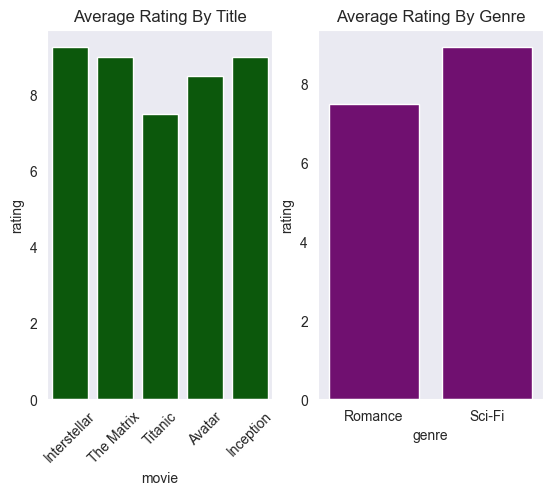

In [38]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Average Rating By Title')
axes[1].set_title('Average Rating By Genre')
movie_ratings = df.group_by('movie').agg(pl.col('rating').mean())
genre_ratings = df.group_by('genre').agg(pl.col('rating').mean())
sns.barplot(
     color='darkgreen', ax=axes[0], y=movie_ratings['rating'], x=movie_ratings['movie']
)
sns.barplot(color='purple', ax=axes[1], y=genre_ratings['rating'], x=genre_ratings['genre'])
sns.set_style('dark')
sns.set_style('dark')
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)
plt.show()

In [39]:
movie_ratings

movie,rating
str,f64
"""Interstellar""",9.25
"""The Matrix""",9.0
"""Titanic""",7.5
"""Avatar""",8.5
"""Inception""",9.0


In [40]:
genre_ratings

genre,rating
str,f64
"""Romance""",7.5
"""Sci-Fi""",8.9375


In [41]:
import polars as pl
import altair as alt

chart1 = (
    movie_ratings.plot.bar(
        x="movie",
        y="rating",
    )
)

chart2 = (
    genre_ratings.plot.bar(
        x="genre",
        y="rating",
    ).encode(color=alt.value("red"))
)

(chart1 | chart2).show()


alt.HConcatChart(...)

AttributeError: 'Axes' object has no attribute 'encode'

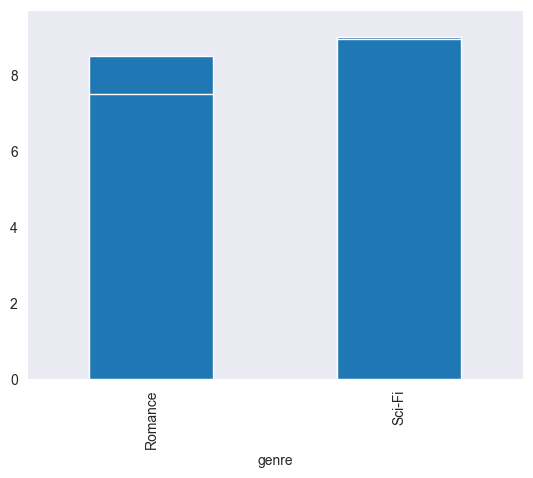

In [33]:
chart1 = (
    movie_ratings.plot.bar(
        x='movie',
        y='rating',
    )
)
chart2 = (
    genre_ratings.plot.bar(
        x='genre',
        y='rating'
    ).encode(color=alt.value('red'))
)
chart1 | chart2